In [24]:
import numpy as np
import pandas as pd

In [25]:
raw_data = pd.read_csv('data\Health_Sleep_Statistics.csv')

In [26]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
raw_data['Result-Encoded']= label_encoder.fit_transform(raw_data['Sleep Disorders']) 

In [27]:
raw_data.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Result-Encoded
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no,0
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes,1
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no,0
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no,1
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no,0


In [28]:
features = raw_data[['Sleep Quality', 'Calories Burned']]
category = raw_data['Result-Encoded']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, category, test_size=0.2, random_state=42)

In [49]:
from sklearn import linear_model
model = linear_model.LogisticRegression(solver='lbfgs')

In [50]:
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
predictions = model.predict(X_test)

In [52]:
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [53]:
from sklearn import metrics
model.score(X_test, y_test)

1.0

In [54]:
metrics.accuracy_score(y_test, predictions)

1.0

In [62]:
metrics.confusion_matrix(y_test, predictions)

array([[14,  0],
       [ 0,  6]])

In [63]:
metrics.precision_score(y_test, predictions)

np.float64(1.0)

In [64]:
metrics.recall_score(y_test, predictions)

np.float64(1.0)

In [65]:
metrics.f1_score(y_test, predictions)

np.float64(1.0)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, predictions)

np.float64(0.0)

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

1.0

In [68]:
model.coef_

array([[ 0.78244471, -0.11797339]])

In [60]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=42)

In [61]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
predictions2 = model2.predict(X_test)

In [69]:
metrics.confusion_matrix(y_test, predictions2)

array([[14,  0],
       [ 0,  6]])

[Text(0.4, 0.875, 'Sleep Quality <= 5.5\ngini = 0.375\nsamples = 80\nvalue = [60, 20]\nclass = No Disorder'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]\nclass = Disorder'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'Calories Burned <= 2250.0\ngini = 0.032\nsamples = 61\nvalue = [60, 1]\nclass = No Disorder'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'Sleep Quality <= 6.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = No Disorder'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = No Disorder'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Disorder'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 53\nvalue = [53, 0]\nclass = No Disorder')]

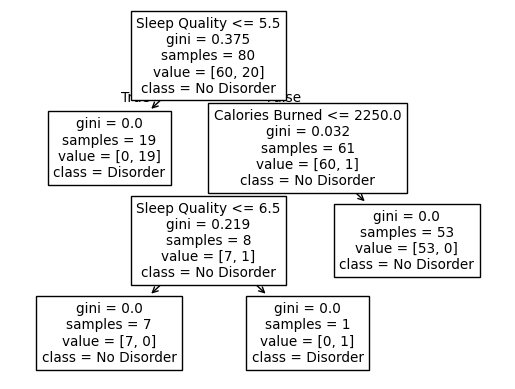

In [43]:
from sklearn import tree
tree.plot_tree(model2, feature_names=['Sleep Quality', 'Calories Burned'], class_names=['No Disorder', 'Disorder'])